In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tarfile


tar_path = '/content/drive/My Drive/Penn_Action.tar.gz'
extract_to = '/content'

with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_to)
print(f'Extracted files to {extract_to}')


Extracted files to /content


In [ ]:
mkdir /content/inputs

In [ ]:
import cv2
import os
import numpy as np

def frames_to_video(frames_dir, output_dir, video_name, fps=30):
    frame_files = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir) if f.endswith('.jpg')])
    if not frame_files:
        raise ValueError("No frames found in the directory.")

    # Get frame dimensions
    frame = cv2.imread(frame_files[0])
    height, width, layers = frame.shape
    size = (width, height)

    video_path = os.path.join(output_dir, video_name + '.mp4')
    out = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, size)

    for filename in frame_files:
        img = cv2.imread(filename)
        out.write(img)

    out.release()
    print(f'Video saved at {video_path}')



In [ ]:
video_name = '0990'

output_dir = '/content/inputs'
frames_dir = f'/content/Penn_Action/frames/{video_name}'
frames_to_video(frames_dir, output_dir, video_name)

Video saved at /content/inputs/0990.mp4


In [ ]:
from scipy.io import loadmat
import numpy as np

def extract_labels(mat_file):
    mat = loadmat(mat_file)
    if 'x' in mat and 'y' in mat:
        keypoints = np.array([np.column_stack((mat['x'][frame], mat['y'][frame])) for frame in range(mat['x'].shape[0])])
    else:
        keypoints = None

    bbox = mat['bbox'] if 'bbox' in mat else None

    labels = {
        'keypoints': keypoints,
        'bbox': bbox
    }
    return labels



In [ ]:
mat_file = f'/content/Penn_Action/labels/{video_name}.mat'
labels = extract_labels(mat_file)

In [ ]:
c

Cloning into 'VideoPose3D'...
remote: Enumerating objects: 121, done.
remote: Total 121 (delta 0), reused 0 (delta 0), pack-reused 121
Receiving objects: 100% (121/121), 9.53 MiB | 18.04 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
cd VideoPose3D

/content/VideoPose3D


In [ ]:
mkdir checkpoint

In [ ]:
cd checkpoint

/content/VideoPose3D/checkpoint


In [ ]:
!wget https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin

--2024-07-26 12:17:56--  https://dl.fbaipublicfiles.com/video-pose-3d/pretrained_h36m_detectron_coco.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67892577 (65M) [application/octet-stream]
Saving to: ‘pretrained_h36m_detectron_coco.bin’

pretrained_h36m_det 100%[===================>]  64.75M   208MB/s    in 0.3s    

2024-07-26 12:17:56 (208 MB/s) - ‘pretrained_h36m_detectron_coco.bin’ saved [67892577/67892577]



In [ ]:
cd /content

/content


In [ ]:
!mkdir output

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-ks9h32t5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-ks9h32t5
  Resolved https://github.com/facebookresearch/detectron2.git to commit 2a420edb307c9bdf640f036d3b196bed474b8593
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 78.1 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
cd /content/VideoPose3D/inference

/content/VideoPose3D/inference


###REPLACE /VideoPose3d/inference/infer_video_d2.py script with the code below

no need to run the code, just replace the script with it.

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

import subprocess as sp
import numpy as np
import time
import argparse
import sys
import os
import glob

def parse_args():
    parser = argparse.ArgumentParser(description='End-to-end inference')
    parser.add_argument(
        '--cfg',
        dest='cfg',
        help='cfg model file (/path/to/model_config.yaml)',
        default=None,
        type=str
    )
    parser.add_argument(
        '--output-dir',
        dest='output_dir',
        help='directory for visualization pdfs (default: /tmp/infer_simple)',
        default='/tmp/infer_simple',
        type=str
    )
    parser.add_argument(
        '--image-ext',
        dest='image_ext',
        help='image file name extension (default: mp4)',
        default='mp4',
        type=str
    )
    parser.add_argument(
        'im_or_folder', help='image or folder of images', default=None
    )
    if len(sys.argv) == 1:
        parser.print_help()
        sys.exit(1)
    return parser.parse_args()

def get_resolution(filename):
    command = ['ffprobe', '-v', 'error', '-select_streams', 'v:0',
               '-show_entries', 'stream=width,height', '-of', 'csv=p=0', filename]
    pipe = sp.Popen(command, stdout=sp.PIPE, bufsize=-1)
    for line in pipe.stdout:
        w, h = line.decode().strip().split(',')
        return int(w), int(h)

def read_video(filename):
    w, h = get_resolution(filename)

    command = ['ffmpeg',
            '-i', filename,
            '-f', 'image2pipe',
            '-pix_fmt', 'bgr24',
            '-vsync', '0',
            '-vcodec', 'rawvideo', '-']

    pipe = sp.Popen(command, stdout=sp.PIPE, bufsize=-1)
    while True:
        data = pipe.stdout.read(w*h*3)
        if not data:
            break
        yield np.frombuffer(data, dtype='uint8').reshape((h, w, 3))


def main(args):

    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file(args.cfg))
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(args.cfg)
    predictor = DefaultPredictor(cfg)


    if os.path.isdir(args.im_or_folder):
        im_list = glob.iglob(args.im_or_folder + '/*.' + args.image_ext)
    else:
        im_list = [args.im_or_folder]

    for video_name in im_list:
        out_name = os.path.join(
                args.output_dir, os.path.basename(video_name)
            )
        print('Processing {}'.format(video_name))

        boxes = []
        segments = []
        keypoints = []

        for frame_i, im in enumerate(read_video(video_name)):
            t = time.time()
            outputs = predictor(im)['instances'].to('cpu')

            print('Frame {} processed in {:.3f}s'.format(frame_i, time.time() - t))

            has_bbox = False
            if outputs.has('pred_boxes'):
                bbox_tensor = outputs.pred_boxes.tensor.numpy()
                if len(bbox_tensor) > 0:
                    has_bbox = True
                    scores = outputs.scores.numpy()[:, None]
                    bbox_tensor = np.concatenate((bbox_tensor, scores), axis=1)
            if has_bbox:
                kps = outputs.pred_keypoints.numpy()
                kps_xy = kps[:, :, :2]
                kps_prob = kps[:, :, 2:3]
                kps_logit = np.zeros_like(kps_prob) # Dummy
                kps = np.concatenate((kps_xy, kps_logit, kps_prob), axis=2)
                kps = kps.transpose(0, 2, 1)
            else:
                kps = []
                bbox_tensor = []

            # Mimic Detectron1 format
            cls_boxes = [[], bbox_tensor]
            cls_keyps = [[], kps]

            boxes.append(cls_boxes)
            segments.append(None)
            keypoints.append(cls_keyps)


        # Video resolution
        metadata = {
            'w': im.shape[1],
            'h': im.shape[0],
        }

        datas = {
            'boxes': boxes,
            'segments': segments,
            'keypoints': keypoints,
            'metadata': metadata
        }
        for key, value in datas.items():
            datas[key] = np.array(value, dtype=object)

        np.savez_compressed(out_name, **datas)


if __name__ == '__main__':
    setup_logger()
    args = parse_args()
    main(args)

In [ ]:
!python infer_video_d2.py \
    --cfg COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml \
    --output-dir /content/output/ \
    --image-ext mp4 \
    /content/inputs

[07/26 12:22:26 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl ...
model_final_997cc7.pkl: 313MB [00:02, 153MB/s]               
Processing /content/inputs/0990.mp4
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libope

In [ ]:
cd /content/VideoPose3D/data

/content/VideoPose3D/data


In [ ]:
!python prepare_data_2d_custom.py -i /content/output -o myvideos

Parsing 2D detections from /content/output
Processing /content/output/0990.mp4.npz
50 total frames processed
0 frames were interpolated
----------
Saving...
Done.


In [ ]:
import numpy as np
data = np.load(os.path.join('/content/VideoPose3D', 'data/data_2d_custom_myvideos.npz'), allow_pickle=True)
postitional_data = data['positions_2d'].item()

In [ ]:
video_id = f'{video_name}.mp4'
pred_keypoints = postitional_data[video_id]['custom'][0]

In [ ]:
pred_keypoints.shape

(50, 17, 2)

In [ ]:
truth_keypoints = labels['keypoints']
bboxes = labels['bbox']

In [ ]:
truth_keypoints.shape

(50, 13, 2)

In [ ]:
import numpy as np

def adjust_keypoints_multi_frame(det_keypoints):
    indices = [0, 6, 5, 8, 7, 10, 9, 12 ,11, 14, 13, 16, 15]
    adjusted_keypoints = det_keypoints[:, indices, :]
    return adjusted_keypoints


In [ ]:
adjusted_keypoints = adjust_keypoints_multi_frame(pred_keypoints)

In [ ]:
path_to_video = os.path.join('/content/inputs',  video_id)
import cv2
import matplotlib.pyplot as plt

def plot_keypoints_on_frame(video_path, truth_keypoints, adjusted_keypoints):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("Failed to read video")
        return

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(frame)

    if truth_keypoints is not None:
        for idx, (x, y) in enumerate(truth_keypoints[0]):
            plt.scatter(x, y, color='blue', s=50)
            plt.annotate(f'{idx}t', (x, y), textcoords="offset points", xytext=(0,10), ha='center', color='white')

    if adjusted_keypoints is not None:
        for idx, (x, y) in enumerate(adjusted_keypoints[0]):
            plt.scatter(x, y, color='red', s=50)
            plt.annotate(f'{idx}p', (x, y), textcoords="offset points", xytext=(0,-15), ha='center', color='white')

    plt.axis('off')
    plt.show()


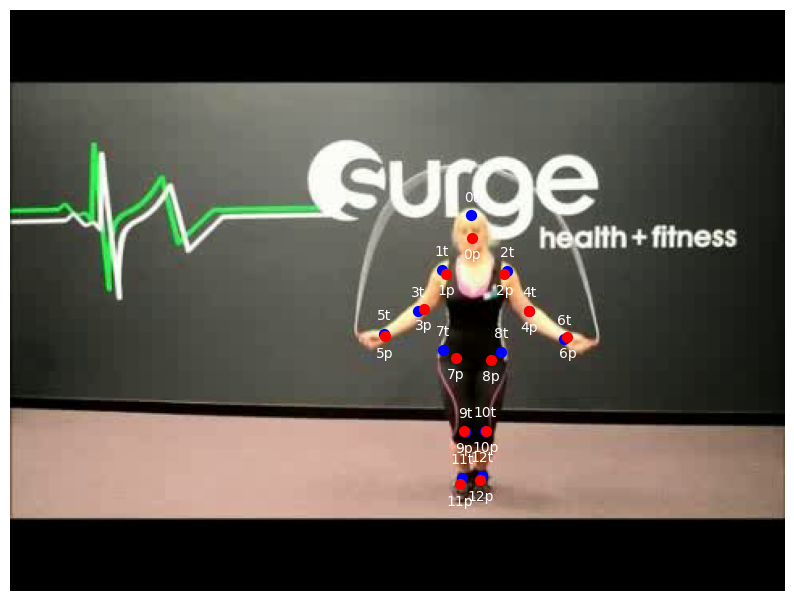

In [ ]:
plot_keypoints_on_frame(path_to_video, truth_keypoints, adjusted_keypoints)

In [ ]:
import cv2
import numpy as np
import os

def plot_keypoints_on_video(video_path, truth_keypoints, predicted_keypoints, bboxes):
    output_dir = '/content/output_videos'
    os.makedirs(output_dir, exist_ok=True)

    video_name = os.path.basename(video_path).split('.')[0]
    output_path = os.path.join(output_dir, f'{video_name}_output.mp4')

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count < len(truth_keypoints):
            for gt, pred in zip(truth_keypoints[frame_count], predicted_keypoints[frame_count]):
                dist = np.linalg.norm(gt - pred)
                cv2.circle(frame, (int(gt[0]), int(gt[1])), radius=max(5, int(dist)), color=(255, 0, 0), thickness=2)
                cv2.circle(frame, (int(gt[0]), int(gt[1])), 2, (0, 255, 255), -1)
            bbox = bboxes[frame_count]
            cv2.rectangle(frame, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 0, 255), 1)

        out.write(frame)
        frame_count += 1

    cap.release()
    out.release()
    print(f'Video processing complete and saved to {output_path}')



import cv2
import numpy as np
import os

def plot_keypoints_on_blank_canvas(video_path, truth_keypoints, predicted_keypoints, bboxes):
    output_dir = '/content/stickman_videos'
    os.makedirs(output_dir, exist_ok=True)

    video_name = os.path.basename(video_path).split('.')[0]
    output_path = os.path.join(output_dir, f'{video_name}_stickman.mp4')

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    connections = [
        (0, 1), (0, 2), (1, 3), (3, 5), (2, 4), (4, 6), (1, 7), (2, 8),
        (7, 9), (9, 11), (8, 10), (10, 12), (1, 2), (7, 8)
    ]

    frame_count = 0
    while frame_count < len(truth_keypoints):
        canvas = np.zeros((frame_height, frame_width, 3), dtype=np.uint8)  # Blank canvas

        # Draw skeleton lines first
        for start, end in connections:
            if frame_count < len(truth_keypoints) and np.all(truth_keypoints[frame_count][start]) and np.all(truth_keypoints[frame_count][end]):
                start_point = tuple(truth_keypoints[frame_count][start].astype(int))
                end_point = tuple(truth_keypoints[frame_count][end].astype(int))
                cv2.line(canvas, start_point, end_point, (0, 0, 255), 1)  # Red color for lines, thinner line

        # Draw keypoints and distance circles
        if frame_count < len(truth_keypoints):
            for gt, pred in zip(truth_keypoints[frame_count], predicted_keypoints[frame_count]):
                dist = np.linalg.norm(gt - pred)
                cv2.circle(canvas, (int(gt[0]), int(gt[1])), 2, (255, 255, 255), -1)  # White color for predicted keypoints
                cv2.circle(canvas, (int(gt[0]), int(gt[1])), radius=max(5, int(dist)), color=(255, 0, 0), thickness=1)  # Circles above lines

            bbox = bboxes[frame_count]
            cv2.rectangle(canvas, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), (0, 0, 255), 1)

        out.write(canvas)
        frame_count += 1

    out.release()
    print(f'Video processing complete and saved to {output_path}')



In [ ]:
video_path = path_to_video
truth_keypoints = np.array(truth_keypoints)
predicted_keypoints = np.array(adjusted_keypoints)
bboxes = np.array(bboxes)
plot_keypoints_on_video(video_path, truth_keypoints, predicted_keypoints, bboxes)


Video processing complete and saved to /content/output_videos/0990_output.mp4


In [ ]:
plot_keypoints_on_blank_canvas(video_path, truth_keypoints, predicted_keypoints, bboxes)

Video processing complete and saved to /content/stickman_videos/0990_stickman.mp4
